## 6.1.4 Create Latitude and Longitude Combinations

In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.
# zip function packs each pair with an index into a tuple.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)                #pack as pairs with zip function`
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

30.573629787482858 57.37288102362385
-42.345551254047024 135.158258846811
15.003403757053434 68.71654139317991
81.81114072011644 3.233523161940127
78.22894440068052 -166.66037480468552
22.365729825860697 -89.09558197362487
-23.093407369777253 89.7785127498758
-85.84145876977918 -120.1068468349595
2.615534967499329 -163.73074965483514
-23.667058974706023 6.167140647726342
-64.80834912866123 -102.76911362554613
3.26131840380377 -129.85685928677134
12.732656582251678 106.60224277789911
34.515474062724465 -161.92342925635714
72.32194713752975 -26.10717994649883
87.60586726340841 -178.83730672205166
-73.77557710899997 57.67955003092331
8.837918113450328 16.105226208361387
-22.147559166614656 -12.32842760136657
7.252927738519958 139.85334708592836
-52.96985020964332 109.9640193708413
-8.374069986810454 57.354987073249816
42.42267382322507 86.57091818185489
30.16971485650545 -24.64180136478521
-2.8157553310231833 -17.095600169433993
-17.521628683270123 166.81784229876013
44.94733373192332 122

-42.09474353375677 74.88521545208843
30.3554260373985 56.5704494951068
-49.278641095709546 21.640958337572812
-7.8371771119197575 4.054839835160749
-83.21844904803078 90.03930146667892
-84.86439934081936 -163.01520639328223
56.08163305393049 76.8811843911609
45.34441286007933 72.21584913078644
25.015740284951846 -125.77745779796071
60.34296193235693 -55.7535936075995
41.78755172317395 164.75903354755934
-78.83468844535207 136.73428994911882
-37.682195722779184 -159.15769457757372
-51.235504491158586 -156.57831818537016
-34.2720378265934 -65.47194207671589
79.15876607549197 117.7166737974905
-16.20604150252825 178.83951080039816
19.79659925821116 -64.54180271540542
-34.34613499195814 64.0284611993061
-8.6195029818971 53.70657762889249
16.61636934662846 -79.54846156810889
32.07403945431376 52.07160968289324
86.5823248163066 116.16984523912532
-27.070281635515833 -65.15417463203688
-10.97946864717413 140.382966117176
-36.707142643226895 65.61431610122543
71.21533145008073 116.742453026313

## 6.1.5 Generate Random World Cities
match those coordinates up with cities

In [23]:
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

634

## 6.2.6 Get the City Weather Data
### import dependencies, initialze an empty list and counters
### loop through lists of cities and build a city url
### Handle API request errors with [try-except] blocks

In [25]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [26]:
# Starting URL for Weather Map API Call.
## build a basic URL with weather_api_key.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Iterate (loop) through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # (conditional statment) if the remainder of the index divided by 50 is equal to 0 
    # and if the index is greater than or equal to 50.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    # (still in the conditional statement) create the URL endpoint for each city, as before. 
    # However, we are removing the blank spaces in the city name and concatenating the city name
    # ex. "san+francisco"
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    # print statenet shows record and set counts, and city being processed
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.(assign variables to each peice of data)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerman
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | malwan
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | dzilam gonzalez
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 10 of Set 1 | henties bay
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | kracheh
City not found. Skipping...
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | benoy
Processing Record 18 of Set 1 | jam

Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | livingston
Processing Record 40 of Set 4 | nantucket
Processing Record 41 of Set 4 | berdigestyakh
Processing Record 42 of Set 4 | shahr-e kord
Processing Record 43 of Set 4 | altamira
Processing Record 44 of Set 4 | rio grande
Processing Record 45 of Set 4 | santa catarina de tepehuanes
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | verkhnevilyuysk
Processing Record 48 of Set 4 | xihe
Processing Record 49 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 50 of Set 4 | opuwo
Processing Record 1 of Set 5 | andenes
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | port macquarie
Processing Record 4 of Set 5 | hervey bay
Processing Record 5 of Set 5 | porto santo
Processing Record 6 of Set 5 | salinas
Processing Record 7 of Set 5 | formiga
Processing Record 8 of Set 5 | imeni poliny osipenko
Processing Record 9 of Set 5 | estelle
Processing Recor

Processing Record 29 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 30 of Set 8 | alta floresta
Processing Record 31 of Set 8 | meyungs
City not found. Skipping...
Processing Record 32 of Set 8 | kudahuvadhoo
Processing Record 33 of Set 8 | kuytun
Processing Record 34 of Set 8 | arraial do cabo
Processing Record 35 of Set 8 | torbay
Processing Record 36 of Set 8 | vanimo
Processing Record 37 of Set 8 | imeni babushkina
Processing Record 38 of Set 8 | kavaratti
Processing Record 39 of Set 8 | anamur
Processing Record 40 of Set 8 | flin flon
Processing Record 41 of Set 8 | kurilsk
Processing Record 42 of Set 8 | latung
Processing Record 43 of Set 8 | wolgast
Processing Record 44 of Set 8 | asfi
Processing Record 45 of Set 8 | mulege
Processing Record 46 of Set 8 | samarai
Processing Record 47 of Set 8 | anshun
Processing Record 48 of Set 8 | turukhansk
Processing Record 49 of Set 8 | mchinji
Processing Record 50 of Set 8 | areosa
Processing Record 1 of Set 9 | mufumbwe

Processing Record 18 of Set 12 | orange cove
Processing Record 19 of Set 12 | gari
Processing Record 20 of Set 12 | peniche
Processing Record 21 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 22 of Set 12 | san roque
Processing Record 23 of Set 12 | biak
Processing Record 24 of Set 12 | japura
Processing Record 25 of Set 12 | calama
Processing Record 26 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 27 of Set 12 | quelimane
Processing Record 28 of Set 12 | altamont
Processing Record 29 of Set 12 | berlevag
Processing Record 30 of Set 12 | luderitz
Processing Record 31 of Set 12 | sisophon
Processing Record 32 of Set 12 | minab
Processing Record 33 of Set 12 | teahupoo
Processing Record 34 of Set 12 | kailua
Processing Record 35 of Set 12 | eleon
City not found. Skipping...
Processing Record 36 of Set 12 | stromness
Processing Record 37 of Set 12 | songea
Processing Record 38 of Set 12 | martyush
Processing Record 39 of Set 12 | carupano
Pro

In [47]:
len(city_data)

589

### creata a dataframe and re-order it 

In [48]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kerman,30.2832,57.0788,71.46,28,0,9.22,IR,2022-08-02 23:31:46
1,Mount Gambier,-37.8333,140.7667,53.51,87,75,17.27,AU,2022-08-02 23:31:47
2,Barrow,71.2906,-156.7887,42.82,81,0,10.36,US,2022-08-02 23:28:57
3,Dzilam Gonzalez,21.2833,-88.9333,82.89,79,79,10.67,MX,2022-08-02 23:31:47
4,Bengkulu,-3.8004,102.2655,74.53,90,64,4.00,ID,2022-08-02 23:31:48
5,Punta Arenas,-53.1500,-70.9167,39.31,93,75,2.30,CL,2022-08-02 23:24:51
6,Henties Bay,-22.1160,14.2845,52.86,79,0,4.97,NA,2022-08-02 23:31:48
7,Atuona,-9.8000,-139.0333,77.31,76,9,14.58,PF,2022-08-02 23:28:46
8,Kapaa,22.0752,-159.3190,84.52,66,20,16.11,US,2022-08-02 23:25:25
9,Benoy,8.9833,16.3199,70.72,94,100,4.65,TD,2022-08-02 23:31:49


assign a variable to the array (new list order), then attach teh df to the new array

In [49]:
new_column_order = ['City', "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]

In [50]:
list(city_data_df)

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [51]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kerman,IR,2022-08-02 23:31:46,30.2832,57.0788,71.46,28,0,9.22
1,Mount Gambier,AU,2022-08-02 23:31:47,-37.8333,140.7667,53.51,87,75,17.27
2,Barrow,US,2022-08-02 23:28:57,71.2906,-156.7887,42.82,81,0,10.36
3,Dzilam Gonzalez,MX,2022-08-02 23:31:47,21.2833,-88.9333,82.89,79,79,10.67
4,Bengkulu,ID,2022-08-02 23:31:48,-3.8004,102.2655,74.53,90,64,4.00
5,Punta Arenas,CL,2022-08-02 23:24:51,-53.1500,-70.9167,39.31,93,75,2.30
6,Henties Bay,NA,2022-08-02 23:31:48,-22.1160,14.2845,52.86,79,0,4.97
7,Atuona,PF,2022-08-02 23:28:46,-9.8000,-139.0333,77.31,76,9,14.58
8,Kapaa,US,2022-08-02 23:25:25,22.0752,-159.3190,84.52,66,20,16.11
9,Benoy,TD,2022-08-02 23:31:49,8.9833,16.3199,70.72,94,100,4.65


create an output file to save the df for reference later

In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV - with an index label.
city_data_df.to_csv(output_data_file, index_label="City_ID")

#### to use the orignal list generated, import or read-in the csv

In [ ]:
import pandas as pd
city_data_df = pd.read_csv ('weather_data/cities.csv')
city_data_df.head(10)

## 6.3 Plot Weather Data
create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed. 


### 6.3.1 Plot Lat vs Temp

In [55]:
# Extract relevant fields from the DataFrame for plotting.
#retreive the data needed for the graph and assign variables.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

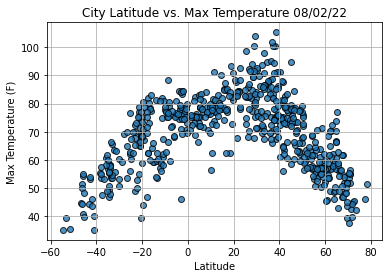

In [57]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### 6.3.2 Plot Lat vs Humidity

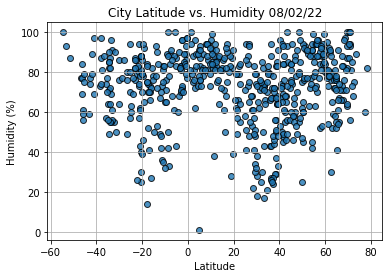

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### 6.3.3 Plot Lat vs Cloudiness

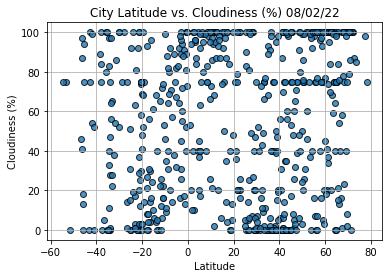

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### 6.3.4 Plot Lat vs Wind Speed

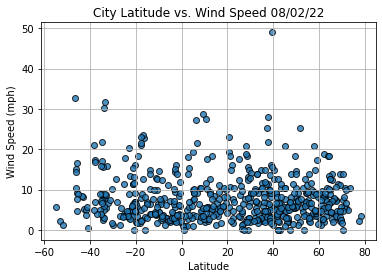

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## 6.4 Determine Correlations

### 6.4.2 Linear Regression to Find the Relationship btw Variables
perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

### Create a linear regression function on the weather data
To get an output from a function, call the function with the correct number of parameters or arguments for the function. (later step)

In [68]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

### create the hemisphere dataframes
the independent variable for the linregress

In [69]:
# look at one row of the df (based on index#)
### loc method can access a group of rows by index, boolean array, or labels.
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                     Victoria
Country                        HK
Date          2022-08-02 23:28:20
Lat                       22.2855
Lng                      114.1577
Max Temp                    84.38
Humidity                       83
Cloudiness                    100
Wind Speed                    3.0
Name: 13, dtype: object

In [70]:
# filter on a specific column (no. hem lat is greater than zero).
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
584     True
585     True
586     True
587     True
588     True
Name: Lat, Length: 589, dtype: bool

In [71]:
# combine the loc and the filter to find No. hem lats
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kerman,IR,2022-08-02 23:31:46,30.2832,57.0788,71.46,28,0,9.22
2,2,Barrow,US,2022-08-02 23:28:57,71.2906,-156.7887,42.82,81,0,10.36
3,3,Dzilam Gonzalez,MX,2022-08-02 23:31:47,21.2833,-88.9333,82.89,79,79,10.67
8,8,Kapaa,US,2022-08-02 23:25:25,22.0752,-159.3190,84.52,66,20,16.11
9,9,Benoy,TD,2022-08-02 23:31:49,8.9833,16.3199,70.72,94,100,4.65


In [72]:
# Create Northern and Southern Hemisphere DataFrames. (new dfs based on the current)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform `linregress` on the MaxTemp for the NO Hemisphere

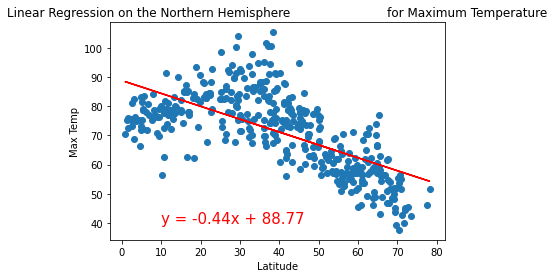

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

### Perform `linregress` on the MaxTemp for the SO Hemisphere

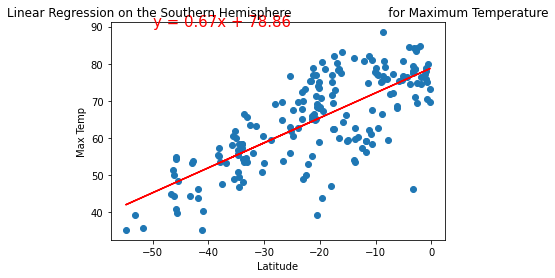

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

### Perform `linregress` on the Humidity for the NO Hemisphere

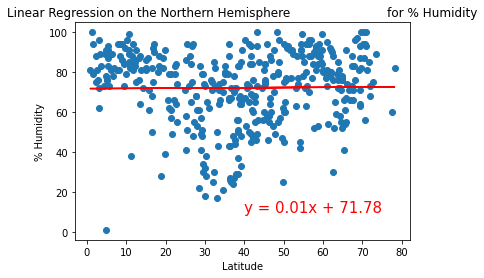

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

### Perform `linregress` on the Humidity for the SO Hemisphere

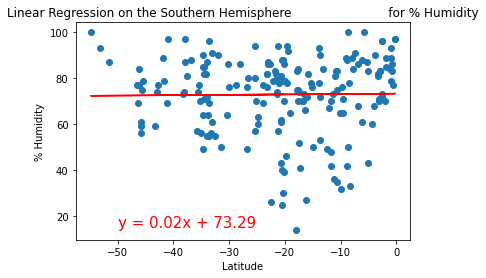

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

### 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

### Perform `linregress` on the % Cloudiness for the NO Hemisphere

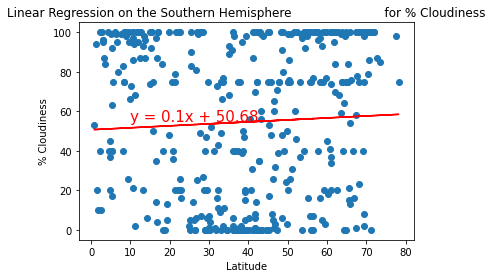

In [82]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(10,55))

### Perform `linregress` on the % Cloudiness for the SO Hemisphere

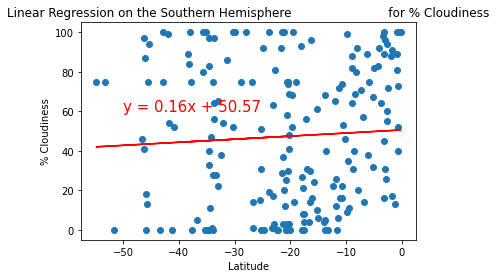

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

### 6.4.5 Find the Correlation Between Latitude and Wind Speed

### Perform `linregress` on the Wind Speed for the NO Hemisphere

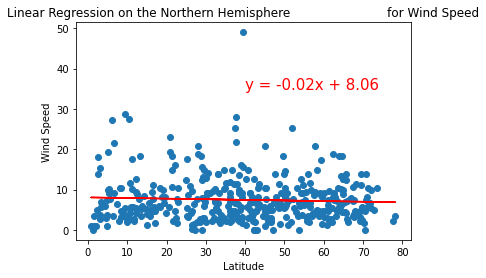

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

### Perform `linregress` on the Wind Speed for the SO Hemisphere

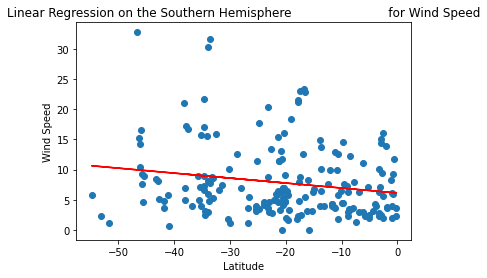

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

## 6.5 Use Google API to Create Heatmaps